![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

A dataset called 'schools.csv' is available, and contains information about the schools and the averages of their SAT scores. 

Now, we are tasked with answering three key questions about New York City (NYC) public school SAT performance:
1. Which NYC schools have the best math results?
2. What are the top 10 performing schools based on the combined SAT scores?
3. Which single borough has the largest standard deviation in the combined SAT score?

In [1]:
#importing the python libraries to perform our analysis and visualizations
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Reading in the data
schools = pd.read_csv("schools.csv")

# Previewing the data
schools.head(n=30)


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
5,Bard High School Early College,Manhattan,M097,634,641,639,70.8
6,Urban Assembly Academy of Government and Law,Manhattan,M445,389,395,381,80.8
7,Marta Valle High School,Manhattan,M025,438,413,394,35.6
8,University Neighborhood High School,Manhattan,M446,437,355,352,69.9
9,New Design High School,Manhattan,M445,381,396,372,73.7


Let's get information and summary statistics about our data. 

In [2]:
schools.info()
schools.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


There are 375 schools in total. We would perform some analysis to see how many of them have an average math percentage of or above 80%.

Let's review the data to find which schools have the best math results. 
The best math results would be at least 80% of the maximum possible score of 800 in the SAT math test.

In [3]:
#index and get the two rows we would need, and sort the math averages in descending order. 
old_best_math_schools = schools[["school_name", "average_math"]].sort_values(by="average_math", ascending=False)

#let's create empty lists to store the averages either equal to and above 80% or below 80%.
above_80 = []
below_80 = []

def percentage():
    global above_80, below_80  
    list_of_math = old_best_math_schools["average_math"]
    list_of_math = list(list_of_math)
    
    for i in list_of_math:
        score_percentage = (i / 800) * 100 
        
        if score_percentage >= 80:
            above_80.append(i)  
        else:
            below_80.append(i)  

# Calling the percentage function to populate above_80 and below_80 lists
percentage()

#filtering the rows that are above 80% to store them in a new variable, alonside the school names.
best_math_schools = old_best_math_schools[old_best_math_schools["average_math"].isin(above_80)][["school_name", "average_math"]]

best_math_schools = best_math_schools.sort_values(by ="average_math", ascending = False)
best_math_schools.head(n=20)

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


Out of 375 schools, only 10 schools have math averages at or above 80% of the maximum possible score of 800. Let's visualize the result.

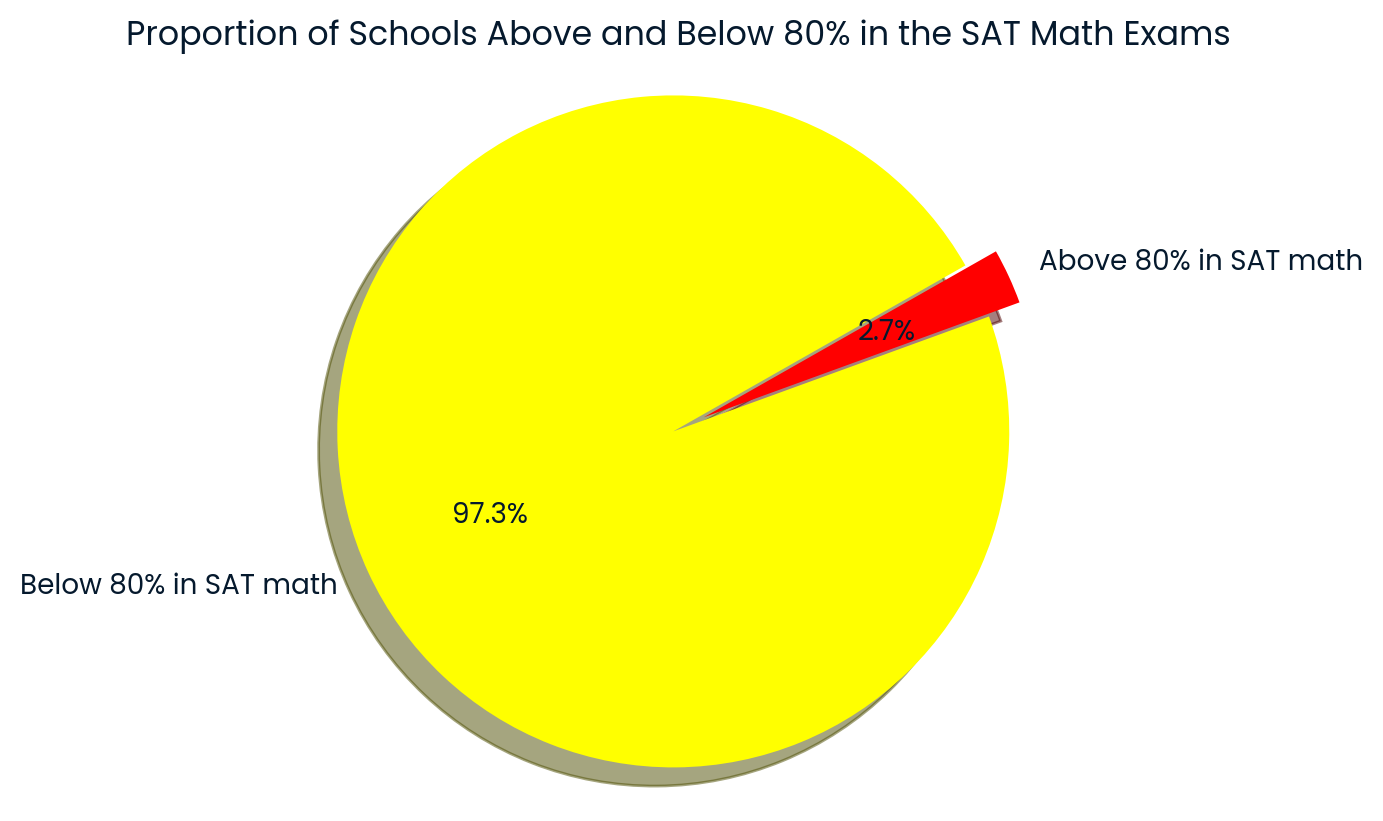

In [4]:
high_percentage = len(best_math_schools["average_math"])
low_percentage = len(schools["average_math"]) - high_percentage

sizes = [high_percentage, low_percentage]
labels = ["Above 80% in SAT math", "Below 80% in SAT math"]
colors = ["red", "yellow"]

plt.pie(sizes, explode = (0.1, 0), labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle= 20)
plt.axis("equal")
plt.title("Proportion of Schools Above and Below 80% in the SAT Math Exams")
plt.show()

The second question is about the top ten performing schools based on their combined SAT scores. We will add all the SAT scores in math, reading, and writing to find which schools have the highest combined scores.

In [5]:
# Calculate the total score for each school by summing the math, reading, and writing scores
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]


# Sort the schools by total score in descending order and select the top 10
top_10_schools = schools.sort_values(by="total_SAT", ascending=False).head(10)

# Select only the relevant columns for the top 10 schools
top_10_schools = top_10_schools[["school_name", "average_math", "average_reading", "average_writing", "total_SAT"]]

# Create a new DataFrame with only the school name and total score
top_10_schools = top_10_schools[["school_name", "total_SAT"]].reset_index(drop=True)

top_10_schools

,school_name,total_SAT
0,Stuyvesant High School,2144
1,Bronx High School of Science,2041
2,Staten Island Technical High School,2041
3,High School of American Studies at Lehman College,2013
4,Townsend Harris High School,1981
5,Queens High School for the Sciences at York Co...,1947
6,Bard High School Early College,1914
7,Brooklyn Technical High School,1896
8,Eleanor Roosevelt High School,1889
9,"High School for Mathematics, Science, and Engi...",1889


This answers our second question about the top 10 performing schools based on their combined SAT scores. Let's visualize it in order to have a clearer picture of it. 

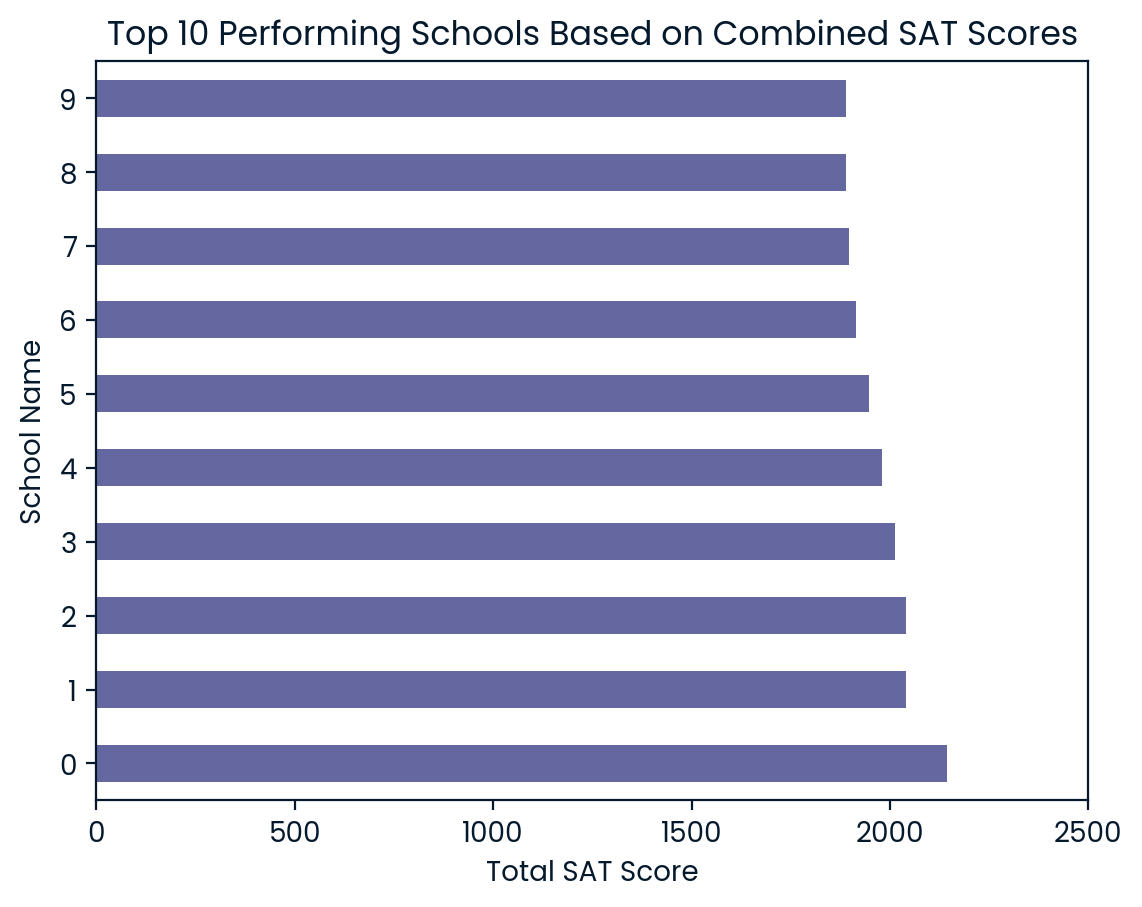

In [6]:
# Create a new dataframe and set the school names as the index for better plotting
top_10_schools = top_10_schools
# Plot the bar chart
top_10_schools["total_SAT"].plot(kind="barh", title="Top 10 Performing Schools Based on Combined SAT Scores")

# Label the axes
plt.xlabel("Total SAT Score")
plt.ylabel("School Name")
plt.xticks([0, 500, 1000, 1500, 2000, 2500])

# Show the plot
plt.show()

To answer the third question, we need to filter the dataset to get the borough with the largest standard deviation. 

In [7]:
#create a dataset to get all the schools with combined SAT scores
combined_scores = schools[["borough", "total_SAT"]]

largest_std_dev = schools.groupby("borough").agg(
    num_schools=("school_name", "count"),
    average_SAT=("total_SAT", "mean"),
    std_SAT=("total_SAT", "std")
).reset_index()

#let's round the average scores and the standard deviation values to two decimal places
largest_std_dev["average_SAT"] = round(largest_std_dev["average_SAT"], 2)
largest_std_dev["std_SAT"] = round(largest_std_dev["std_SAT"], 2)

#Let's sort the std_SAT column in descending order to get the borough with the highest standard deviation
largest_std_dev = largest_std_dev.sort_values(by="std_SAT", ascending = False).reset_index(drop=True)

manhattan = largest_std_dev[largest_std_dev["borough"] == "Manhattan"]
largest_std_dev = manhattan
largest_std_dev

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29


The borough with the highest standard deviation in SAT scores is Manhattan. This indicates that SAT scores from schools in Manhattan vary widely. Some schools have high-performing students with high SAT scores, while other schools have students with much lower SAT scores. This variability suggests disparities in academic performance and potentially unequal access to educational resources within the borough.
